In [ ]:
# utilities
import re
import numpy as np
import pandas as pd

In [ ]:
# mounting
from google.colab import drive
import csv

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


load the dataset

# Data preprocess

# Data cleaning

In [ ]:
loaded_df=pd.read_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights.csv')
loaded_df.head()

<ipython-input-3-c8f8d3dff73f>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  loaded_df=pd.read_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= loaded_df.copy()

# Plotting some graphs

bar plot to see airlines most flown with

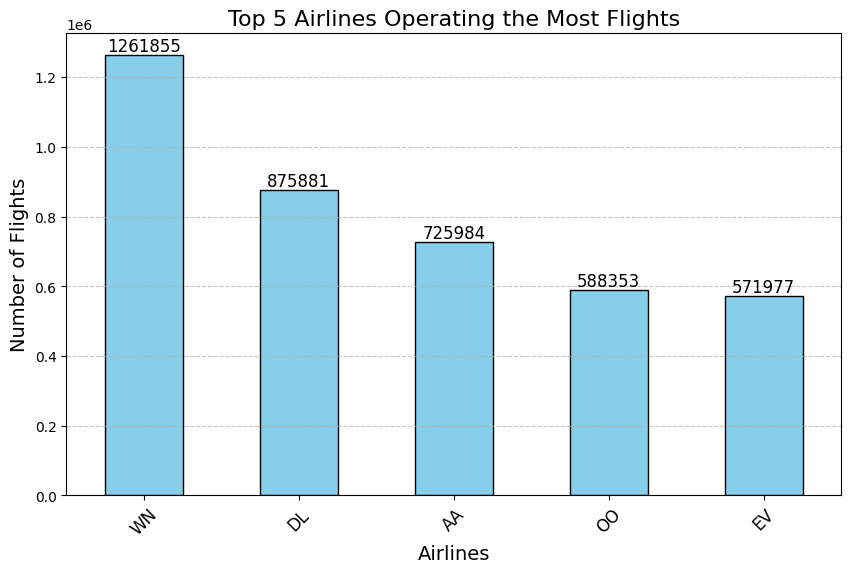

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'AIRLINE' and count the number of flights
top_airlines = df['AIRLINE'].value_counts().head(5)

# Plot the top 5 airlines as a bar plot
plt.figure(figsize=(10, 6))
bars = top_airlines.plot(kind='bar', color='skyblue', edgecolor='black')

# Annotate each bar with the count
for i, value in enumerate(top_airlines):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Add title and labels
plt.title('Top 5 Airlines Operating the Most Flights', fontsize=16)
plt.xlabel('Airlines', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


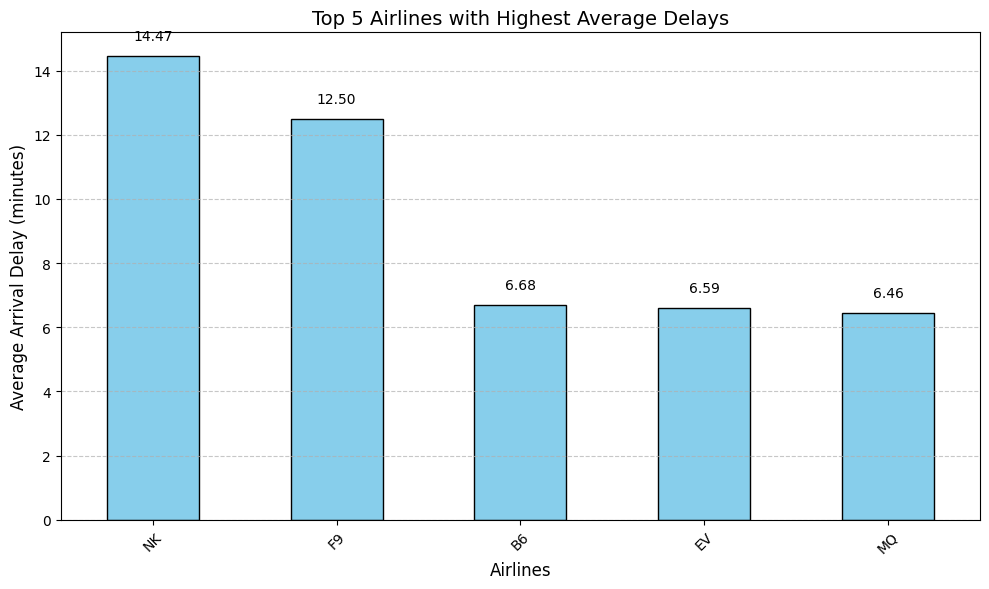

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average delay for each airline
average_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)

# Get the top airlines with the highest average delays
top_airlines_delays = average_delays.head(5)

# Plot the results
plt.figure(figsize=(10, 6))
top_airlines_delays.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Airlines with Highest Average Delays', fontsize=14)
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for index, value in enumerate(top_airlines_delays):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


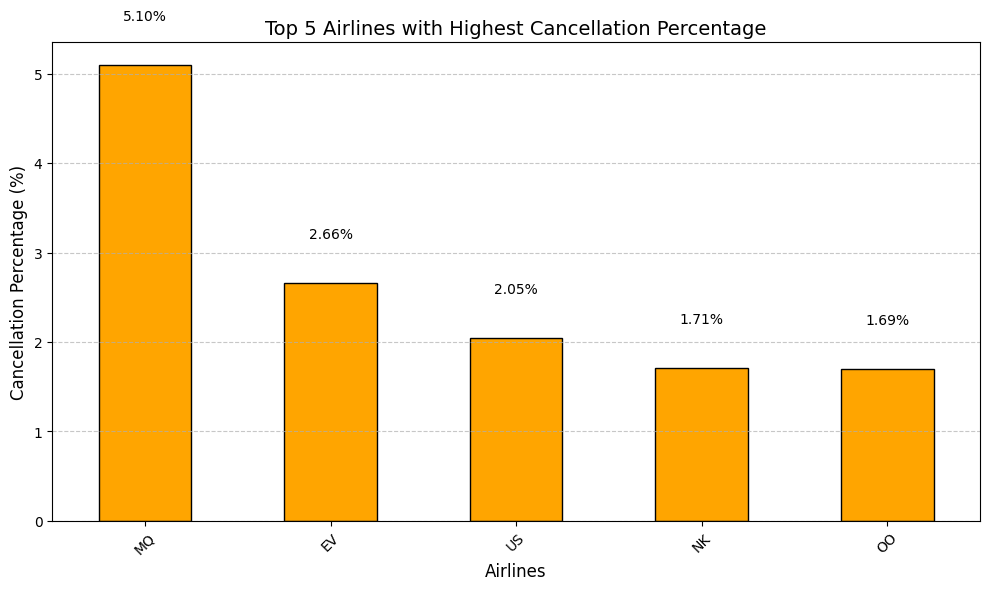

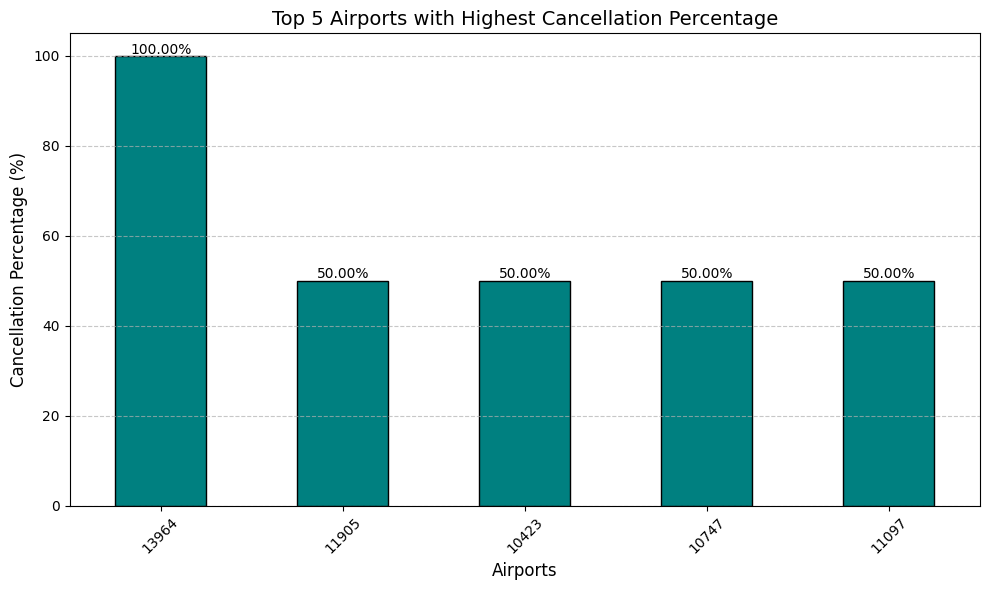

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of cancellations by airlines
airline_cancellations = (
    df[df["CANCELLED"] == 1].groupby("AIRLINE")["CANCELLED"].count() / df.groupby("AIRLINE")["CANCELLED"].count()
) * 100

# Get the top airlines with the highest percentage of cancellations
top_airline_cancellations = airline_cancellations.sort_values(ascending=False).head(5)

# Calculate the percentage of cancellations by origin airports
airport_cancellations = (
    df[df["CANCELLED"] == 1].groupby("ORIGIN_AIRPORT")["CANCELLED"].count() / df.groupby("ORIGIN_AIRPORT")["CANCELLED"].count()
) * 100

# Get the top airports with the highest percentage of cancellations
top_airport_cancellations = airport_cancellations.sort_values(ascending=False).head(5)

# Plot for airline cancellations
plt.figure(figsize=(10, 6))
top_airline_cancellations.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 5 Airlines with Highest Cancellation Percentage", fontsize=14)
plt.xlabel("Airlines", fontsize=12)
plt.ylabel("Cancellation Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for index, value in enumerate(top_airline_cancellations):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha="center", fontsize=10)
plt.tight_layout()
plt.show()

# Plot for airport cancellations
plt.figure(figsize=(10, 6))
top_airport_cancellations.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Top 5 Airports with Highest Cancellation Percentage", fontsize=14)
plt.xlabel("Airports", fontsize=12)
plt.ylabel("Cancellation Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for index, value in enumerate(top_airport_cancellations):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha="center", fontsize=10)
plt.tight_layout()
plt.show()


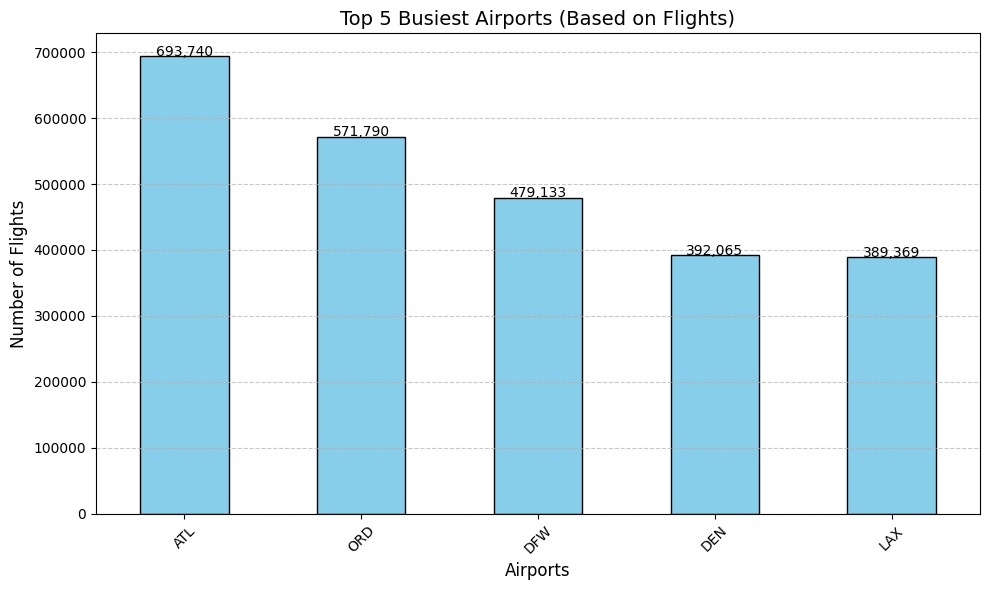

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine origin and destination flight counts for each airport
origin_counts = df["ORIGIN_AIRPORT"].value_counts()
destination_counts = df["DESTINATION_AIRPORT"].value_counts()

# Total flight counts for each airport
total_flight_counts = origin_counts.add(destination_counts, fill_value=0).sort_values(ascending=False)

# Get the top 5 busiest airports
top_busiest_airports = total_flight_counts.head(5)

# Plot
plt.figure(figsize=(10, 6))
top_busiest_airports.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Busiest Airports (Based on Flights)", fontsize=14)
plt.xlabel("Airports", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for index, value in enumerate(top_busiest_airports):
    plt.text(index, value + 500, f'{int(value):,}', ha="center", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Number of unique values for all columns
string_columns = loaded_df.select_dtypes(include=['object']).columns

for column in string_columns:
    unique_count = loaded_df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")


Number of unique values in column 'AIRLINE': 14
Number of unique values in column 'TAIL_NUMBER': 4897
Number of unique values in column 'ORIGIN_AIRPORT': 930
Number of unique values in column 'DESTINATION_AIRPORT': 930
Number of unique values in column 'CANCELLATION_REASON': 4


In [ ]:
print(loaded_df["ARRIVAL_DELAY"].describe())

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64


In [ ]:
df = loaded_df.copy()
# Drop rows where CANCELLATION_REASON_ENCODED is 3
#df_copy = loaded_df[loaded_df["CANCELLATION_REASON_ENCODED"] != 3].copy()

# Verify the rows are dropped
#print(df_copy["CANCELLATION_REASON_ENCODED"].value_counts())

print(df.shape)
print(df.dtypes)
print(df.info())
print(df.isnull().sum())

(5819079, 31)
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object
<class 'pan

we will not consider cancelled flights for delay prediction. we will predict arrival delay, so all columns unncessary or irrelevant to that will be dropped.

YEAR: Irrelevant for prediction as all data is from the same year.

TAIL_NUMBER: Likely a unique identifier for aircraft, not meaningful for prediction.

DIVERTED: Indicates if the flight was diverted; already implicitly encoded in ARRIVAL_DELAY (diverted flights have extreme delays).

CANCELLED: Flights marked as canceled won’t have meaningful ARRIVAL_DELAY values.

CANCELLATION_REASON: Irrelevant since canceled flights are excluded from prediction.

Delay Components (AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY):

These are granular breakdowns of ARRIVAL_DELAY and not available for prediction in real-world scenarios.
Including them would introduce data leakage.

In [ ]:
df['CANCELLED'].value_counts()
# dropping rows that has cancelled =1
df = df[df['CANCELLED'] == 0]

In [ ]:
df['CANCELLED'].value_counts()

,count
CANCELLED,
0,5729195


In [ ]:
# Columns to drop
columns_to_drop = [
    "YEAR", "TAIL_NUMBER", "CANCELLED", "CANCELLATION_REASON",
    "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"
]

# Drop columns
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5729195 entries, 0 to 5819078
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   DEPARTURE_DELAY      float64
 10  TAXI_OUT             float64
 11  WHEELS_OFF           float64
 12  SCHEDULED_TIME       float64
 13  ELAPSED_TIME         float64
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  WHEELS_ON            float64
 17  TAXI_IN              float64
 18  SCHEDULED_ARRIVAL    int64  
 19  ARRIVAL_TIME         float64
 20  ARRIVAL_DELAY        float64
 21  DIVERTED             int64  
dtypes: float64(11), int64(8), object(3)
memory usage: 1005.3+ MB
None


In [ ]:
df['SCHEDULED_DEPARTURE'].value_counts()
df['FLIGHT_NUMBER'].value_counts()
df['DIVERTED'].value_counts()
df['ARRIVAL_DELAY'].value_counts()

,count
ARRIVAL_DELAY,
-8.0,176899
-9.0,176016
-10.0,175232
-7.0,174524
-11.0,171557
...,...
1068.0,1
857.0,1
1100.0,1


In [ ]:
# dropping SCHEDULED_DEPARTURE because DEPARTURE_TIME and delay has all relevant info
# dropping WHEELS_ON, TAXI_IN because these are related to arrival
# will drop ARRIVAL_TIME because it will directly give away arrival delay by comparing with SCHEDULED_ARRIVAL
columns_to_drop = ['SCHEDULED_DEPARTURE','WHEELS_ON','TAXI_IN','DIVERTED']
df2 = df.drop(columns=columns_to_drop)

In [ ]:
# want to see 10 rows of only selected columns in df
columns_to_view = ['SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','SCHEDULED_ARRIVAL','ARRIVAL_TIME']
df2[columns_to_view].head(10)

,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,205.0,194.0,169.0,1448,430,408.0
1,280.0,279.0,263.0,2330,750,741.0
2,286.0,293.0,266.0,2296,806,811.0
3,285.0,281.0,258.0,2342,805,756.0
4,235.0,215.0,199.0,1448,320,259.0
5,217.0,230.0,206.0,1589,602,610.0
6,181.0,170.0,154.0,1299,526,509.0
7,273.0,249.0,228.0,2125,803,753.0
8,195.0,193.0,173.0,1464,545,532.0
9,221.0,203.0,186.0,1747,711,656.0


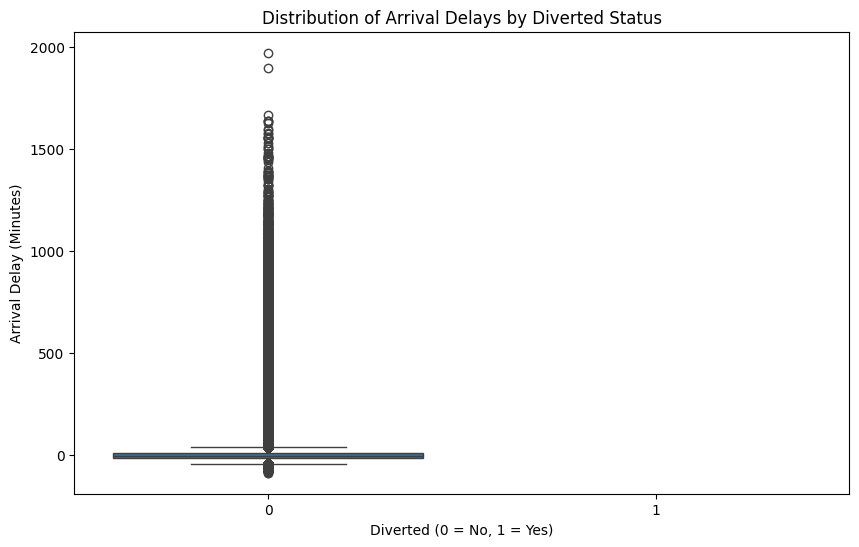

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="DIVERTED", y="ARRIVAL_DELAY", data=df2)
plt.title("Distribution of Arrival Delays by Diverted Status")
plt.xlabel("Diverted (0 = No, 1 = Yes)")
plt.ylabel("Arrival Delay (Minutes)")
plt.show()


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5729195 entries, 0 to 5819078
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   DEPARTURE_TIME       float64
 8   DEPARTURE_DELAY      float64
 9   TAXI_OUT             float64
 10  WHEELS_OFF           float64
 11  SCHEDULED_TIME       float64
 12  ELAPSED_TIME         float64
 13  AIR_TIME             float64
 14  DISTANCE             int64  
 15  SCHEDULED_ARRIVAL    int64  
 16  ARRIVAL_TIME         float64
 17  ARRIVAL_DELAY        float64
dtypes: float64(9), int64(6), object(3)
memory usage: 830.5+ MB


add is_holiday like the other script

In [ ]:
import datetime

# List of holidays in 2015 (MONTH, DAY)
holidays_2015 = [
    datetime.date(2015, 1, 1),   # New Year's Day
    datetime.date(2015, 1, 19),  # Martin Luther King Jr. Day
    datetime.date(2015, 2, 16),  # Presidents' Day
    datetime.date(2015, 5, 25),  # Memorial Day
    datetime.date(2015, 7, 3),   # Independence Day (observed)
    datetime.date(2015, 9, 7),   # Labor Day
    datetime.date(2015, 10, 12), # Columbus Day
    datetime.date(2015, 11, 11), # Veterans Day
    datetime.date(2015, 11, 26), # Thanksgiving Day
    datetime.date(2015, 12, 25)  # Christmas Day
]

# Create a new column with the date
df2["DATE"] = df2.apply(lambda row: datetime.date(2015, row["MONTH"], row["DAY"]), axis=1)


# Include one day before and after each holiday
expanded_holidays = set(holidays_2015)
for holiday in holidays_2015:
    expanded_holidays.add(holiday - datetime.timedelta(days=1))  # Day before
    expanded_holidays.add(holiday + datetime.timedelta(days=1))  # Day after

# Update is_holiday with expanded holidays
df2["is_holiday"] = df2["DATE"].apply(lambda x: 1 if x in expanded_holidays else 0)
df2.drop("DATE", axis=1, inplace=True)
print(df2["is_holiday"])

0          1
1          1
2          1
3          1
4          1
          ..
5819074    0
5819075    0
5819076    0
5819077    0
5819078    0
Name: is_holiday, Length: 5729195, dtype: int64


In [ ]:
df2.info(())

<class 'pandas.core.frame.DataFrame'>
Index: 5729195 entries, 0 to 5819078
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   DEPARTURE_TIME       float64
 8   DEPARTURE_DELAY      float64
 9   TAXI_OUT             float64
 10  WHEELS_OFF           float64
 11  SCHEDULED_TIME       float64
 12  ELAPSED_TIME         float64
 13  AIR_TIME             float64
 14  DISTANCE             int64  
 15  SCHEDULED_ARRIVAL    int64  
 16  ARRIVAL_TIME         float64
 17  ARRIVAL_DELAY        float64
 18  is_holiday           int64  
dtypes: float64(9), int64(7), object(3)
memory usage: 874.2+ MB


In [ ]:
df2.to_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights_delay_cleaned.csv', index=False)

# Data transformation

In [ ]:
loaded_df=pd.read_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights_delay_cleaned.csv')
loaded_df.head()

<ipython-input-4-792cbaf095b1>:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  loaded_df=pd.read_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights_delay_cleaned.csv')


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,is_holiday
0,1,1,4,AS,98,ANC,SEA,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,430,408.0,-22.0,1
1,1,1,4,AA,2336,LAX,PBI,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,750,741.0,-9.0,1
2,1,1,4,US,840,SFO,CLT,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,806,811.0,5.0,1
3,1,1,4,AA,258,LAX,MIA,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,805,756.0,-9.0,1
4,1,1,4,AS,135,SEA,ANC,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,320,259.0,-21.0,1


In [ ]:
loaded_df.shape

(5729195, 19)

In [ ]:
columns_to_drop = ['SCHEDULED_TIME','ELAPSED_TIME','ARRIVAL_TIME']
loaded_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# drop rows with null values
loaded_df.dropna(inplace=True)

In [ ]:
# Randomly sample 100,000 rows
df_sampled = loaded_df.sample(n=100000, random_state=42)
df_sampled = df_sampled.reset_index(drop=True)


In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   DAY_OF_WEEK          100000 non-null  int64  
 3   AIRLINE              100000 non-null  object 
 4   FLIGHT_NUMBER        100000 non-null  int64  
 5   ORIGIN_AIRPORT       100000 non-null  object 
 6   DESTINATION_AIRPORT  100000 non-null  object 
 7   DEPARTURE_TIME       100000 non-null  float64
 8   DEPARTURE_DELAY      100000 non-null  float64
 9   TAXI_OUT             100000 non-null  float64
 10  WHEELS_OFF           100000 non-null  float64
 11  AIR_TIME             100000 non-null  float64
 12  DISTANCE             100000 non-null  int64  
 13  SCHEDULED_ARRIVAL    100000 non-null  int64  
 14  ARRIVAL_DELAY        100000 non-null  float64
 15  is_holiday        

In [ ]:
print(df_sampled.isnull().sum())

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
AIR_TIME               0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
is_holiday             0
dtype: int64


In [ ]:
df_sampled.to_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights_delay_sampled.csv', index=False)

# value column gular ki kra hbe fix kor. string column airline re one hot encoding, baki duitare freq encoding but only from train set frequency. Then random forest diye baselining and NN diye final training

In [ ]:
df_sampled = pd.read_csv('drive/MyDrive/Course_Content/ML/ML project/Flight_delay/Dataset/flights_delay_sampled.csv')



splitting DEPARTURE_TIME and SCHEDULED_ARRIVAL into hour and minute.

In [ ]:
df_sampled["DEPARTURE_TIME_HOUR"] = df_sampled["DEPARTURE_TIME"] // 100
df_sampled["DEPARTURE_TIME_MINUTE"] = df_sampled["DEPARTURE_TIME"] % 100
df_sampled.drop("DEPARTURE_TIME", axis=1, inplace=True)

df_sampled["SCHEDULED_ARRIVAL_HOUR"] = df_sampled["SCHEDULED_ARRIVAL"] // 100
df_sampled["SCHEDULED_ARRIVAL_MINUTE"] = df_sampled["SCHEDULED_ARRIVAL"] % 100
df_sampled.drop("SCHEDULED_ARRIVAL", axis=1, inplace=True)

One hot encoding for the airline column

In [ ]:
df_sampled2 = pd.get_dummies(df_sampled, columns=["AIRLINE"], prefix="AIRLINE", drop_first=True)

# Only convert the one-hot encoded columns to int
airline_columns = [col for col in df_sampled2.columns if col.startswith("AIRLINE_")]
df_sampled2[airline_columns] = df_sampled2[airline_columns].astype(int)

In [ ]:
# Number of unique values in a column
unique_count = df_sampled2["DESTINATION_AIRPORT"].nunique()
print(f"Number of unique values: {unique_count}")

Number of unique values: 582


In [ ]:
print(df_sampled2.shape)
print(df_sampled2.info())

(100000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MONTH                     100000 non-null  int64  
 1   DAY                       100000 non-null  int64  
 2   DAY_OF_WEEK               100000 non-null  int64  
 3   FLIGHT_NUMBER             100000 non-null  int64  
 4   ORIGIN_AIRPORT            100000 non-null  object 
 5   DESTINATION_AIRPORT       100000 non-null  object 
 6   DEPARTURE_DELAY           100000 non-null  float64
 7   TAXI_OUT                  100000 non-null  float64
 8   WHEELS_OFF                100000 non-null  float64
 9   AIR_TIME                  100000 non-null  float64
 10  DISTANCE                  100000 non-null  int64  
 11  ARRIVAL_DELAY             100000 non-null  float64
 12  is_holiday                100000 non-null  int64  
 13  DEPARTURE_TIME_HOUR       100000

Frequency encoding on ORIGIN_AIRPORT and DESTINATION_AIRPORT column.

In [ ]:
# Compute frequency maps
airport_freq_map = df_sampled2["ORIGIN_AIRPORT"].value_counts().to_dict()
print(airport_freq_map)

{'ATL': 5987, 'ORD': 4792, 'DFW': 4028, 'LAX': 3383, 'DEN': 3336, 'PHX': 2587, 'SFO': 2518, 'IAH': 2440, 'LAS': 2259, 'MSP': 2011, 'MCO': 1928, 'DTW': 1861, 'SEA': 1830, 'BOS': 1811, 'CLT': 1739, 'EWR': 1733, 'SLC': 1698, 'JFK': 1697, 'LGA': 1697, 'BWI': 1531, 'MDW': 1369, 'DCA': 1320, 'FLL': 1261, 'SAN': 1215, 'MIA': 1191, 'PHL': 1154, 'TPA': 1094, 'DAL': 1062, 'HOU': 949, 'PDX': 849, 'STL': 834, 'BNA': 755, 'OAK': 755, 'AUS': 723, 'HNL': 712, 'SJC': 704, 'SMF': 698, 'MCI': 660, 'CLE': 623, 'MSY': 620, 'SNA': 609, '10397': 550, 'IAD': 544, 'SAT': 531, '13930': 521, 'RDU': 508, 'RSW': 482, 'MKE': 479, 'SJU': 454, 'IND': 447, 'CMH': 407, 'PIT': 399, 'PBI': 397, 'OGG': 383, '11298': 369, 'CVG': 358, 'BDL': 331, 'JAX': 310, '12892': 307, 'ABQ': 300, 'ONT': 299, 'BUF': 298, '11292': 296, 'OKC': 291, 'BUR': 290, 'OMA': 283, 'ANC': 272, 'RIC': 268, 'TUS': 252, 'MEM': 251, '14771': 246, 'RNO': 241, '12266': 241, 'TUL': 233, '12889': 230, 'ELP': 210, '14107': 209, 'BOI': 200, 'BHM': 189, 'PVD'

In [ ]:
from sklearn.model_selection import train_test_split

X = df_sampled2.drop("ARRIVAL_DELAY", axis=1)  # Features
y = df_sampled2["ARRIVAL_DELAY"]

# Split into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.11, random_state=42  # 0.1765 = 10 / 90
)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (80100, 29), Validation set: (9900, 29), Test set: (10000, 29)


In [ ]:
# Frequency encoding for train, validation, and test sets
X_train["ORIGIN_AIRPORT_freq"] = X_train["ORIGIN_AIRPORT"].map(airport_freq_map)
X_val["ORIGIN_AIRPORT_freq"] = X_val["ORIGIN_AIRPORT"].map(airport_freq_map)
X_test["ORIGIN_AIRPORT_freq"] = X_test["ORIGIN_AIRPORT"].map(airport_freq_map)

X_train["DESTINATION_AIRPORT_freq"] = X_train["DESTINATION_AIRPORT"].map(airport_freq_map)
X_val["DESTINATION_AIRPORT_freq"] = X_val["DESTINATION_AIRPORT"].map(airport_freq_map)
X_test["DESTINATION_AIRPORT_freq"] = X_test["DESTINATION_AIRPORT"].map(airport_freq_map)




In [ ]:
# Drop the original airport code columns
X_train = X_train.drop(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"], axis=1)
X_val = X_val.drop(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"], axis=1)
X_test = X_test.drop(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score
import pickle


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100,n_jobs = -1, max_depth=None)
# n_jobs = -1 ensuring the use of all CPU coresﬁ

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print("Validation Set Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


# Save the trained model to a file
with open("trained_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

Validation Set Performance:
Mean Absolute Error (MAE): 6.96
Mean Squared Error (MSE): 95.60
R-squared (R²): 0.93


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Summary of Your Baseline Results for RandomForestRegressor

Validation Set Performance:
Mean Absolute Error (MAE): 6.96 ( Indicates accurate predictions.)

Mean Squared Error (MSE): 95.60 (Shows that large errors are rare.)

R-squared (R²) (Represents the proportion of variance in the target variable that is explained by the model) : 0.93 (Indicates your model explains most of the variability in the target.)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",  # For regression
    n_estimators=100,             # Number of trees
    max_depth=10,                  # Maximum depth of each tree
    learning_rate=0.1,            # Learning rate (eta)
    subsample=0.8,                # Fraction of samples used per tree
    colsample_bytree=0.8,         # Fraction of features used per tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Validation Set Performance:
Mean Absolute Error (MAE): 6.42
Mean Squared Error (MSE): 114.97
R-squared (R²): 0.92


Summary of Your Baseline Results for  XGBoost Regressor

Validation Set Performance:
Mean Absolute Error (MAE): 6.42 ( Indicates accurate predictions.)

Mean Squared Error (MSE): 114.97 (Shows that large errors are rare.)

R-squared (R²) (Represents the proportion of variance in the target variable that is explained by the model) : 0.92 (Indicates your model explains most of the variability in the target.)

grid searching on XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, make_scorer

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [10, 15, 7],             # Maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate (eta)
    'subsample': [0.8, 1.0],            # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0]      # Fraction of features per tree
}
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,             # Optimize for MAE
    cv=5,                       # 5-fold cross-validation
    verbose=1,                  # Display progress
    n_jobs=-1                   # Use all available CPU cores
)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MAE):", -grid_search.best_score_)

# Use the best estimator for predictions
best_xgb_model = grid_search.best_estimator_
y_val_pred = best_xgb_model.predict(X_val)

# Evaluate on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Validation MAE with Best Model: {mae:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Score (MAE): 5.929844622558067
Validation MAE with Best Model: 5.71


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def run_xgboost(X_train, y_train, X_val, y_val, params):

  # Initialize XGBoost Regressor
  xgb_model = xgb.XGBRegressor(
      objective=params['objective'],  # For regression
      n_estimators=params['n_estimators'],             # Number of trees
      max_depth=params['max_depth'],                  # Maximum depth of each tree
      learning_rate=params['learning_rate'],            # Learning rate (eta)
      subsample=params['subsample'],                # Fraction of samples used per tree
      colsample_bytree=params['colsample_bytree'],         # Fraction of features used per tree
      random_state=42
  )

  # Train the model
  xgb_model.fit(X_train, y_train)

  # Predict on the validation set
  y_val_pred = xgb_model.predict(X_val)

  # Evaluate the model
  mae = mean_absolute_error(y_val, y_val_pred)
  mse = mean_squared_error(y_val, y_val_pred)
  r2 = r2_score(y_val, y_val_pred)

  print("Validation Set Performance:")
  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"R-squared (R²): {r2:.2f}")


Validation Set Performance:
Mean Absolute Error (MAE): 5.85
Mean Squared Error (MSE): 103.09
R-squared (R²): 0.93

In [ ]:
params = {
    "objective" :"reg:squarederror",  # For regression
    "n_estimators" : 500,             # Number of trees
    "max_depth" : 15,                  # Maximum depth of each tree
    "learning_rate" : 0.01,            # Learning rate (eta)
    "subsample" : 0.8,                # Fraction of samples used per tree
    "colsample_bytree" : 0.8,         # Fraction of features used per tree
}
run_xgboost(X_train, y_train, X_val, y_val,params)

Validation Set Performance:
Mean Absolute Error (MAE): 6.75
Mean Squared Error (MSE): 127.52
R-squared (R²): 0.91


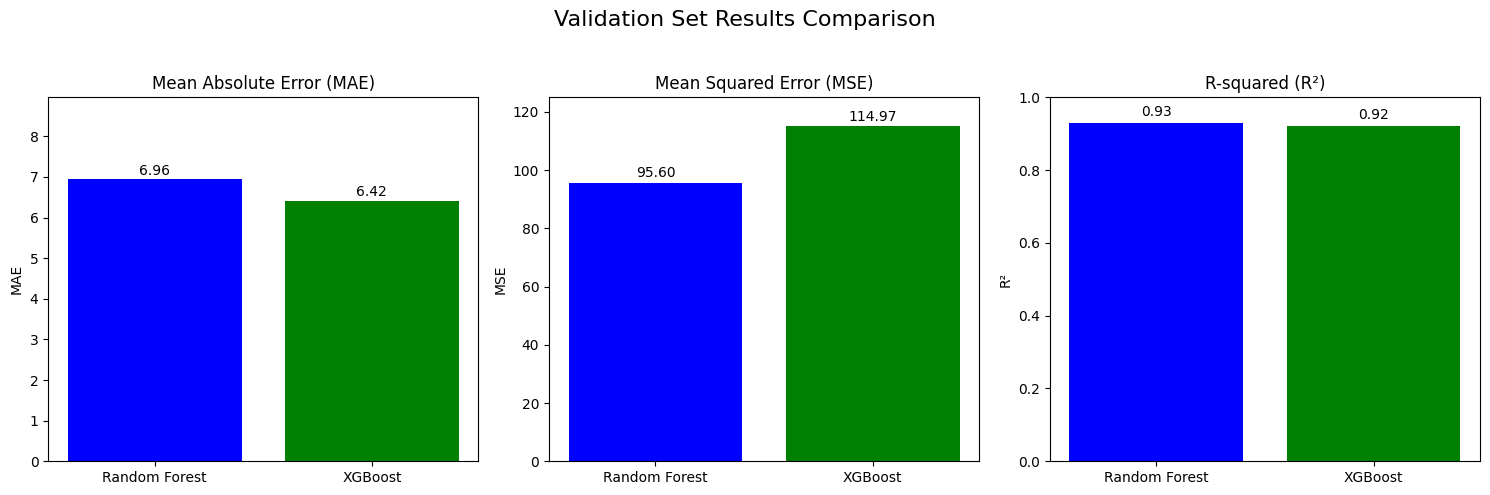

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data to visualize
models = ["Random Forest", "XGBoost"]
mae = [6.96, 6.42]
mse = [95.60, 114.97]
r2 = [0.93, 0.92]

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Plotting Mean Absolute Error (MAE)
axs[0].bar(models, mae, color=['blue', 'green'])
axs[0].set_title("Mean Absolute Error (MAE)")
axs[0].set_ylabel("MAE")
axs[0].set_ylim([0, max(mae) + 2])
for i, v in enumerate(mae):
    axs[0].text(i, v + 0.1, f"{v:.2f}", ha='center')

# Plotting Mean Squared Error (MSE)
axs[1].bar(models, mse, color=['blue', 'green'])
axs[1].set_title("Mean Squared Error (MSE)")
axs[1].set_ylabel("MSE")
axs[1].set_ylim([0, max(mse) + 10])
for i, v in enumerate(mse):
    axs[1].text(i, v + 2, f"{v:.2f}", ha='center')

# Plotting R-squared (R²)
axs[2].bar(models, r2, color=['blue', 'green'])
axs[2].set_title("R-squared (R²)")
axs[2].set_ylabel("R²")
axs[2].set_ylim([0, 1])
for i, v in enumerate(r2):
    axs[2].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Overall layout adjustments
plt.suptitle("Validation Set Results Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


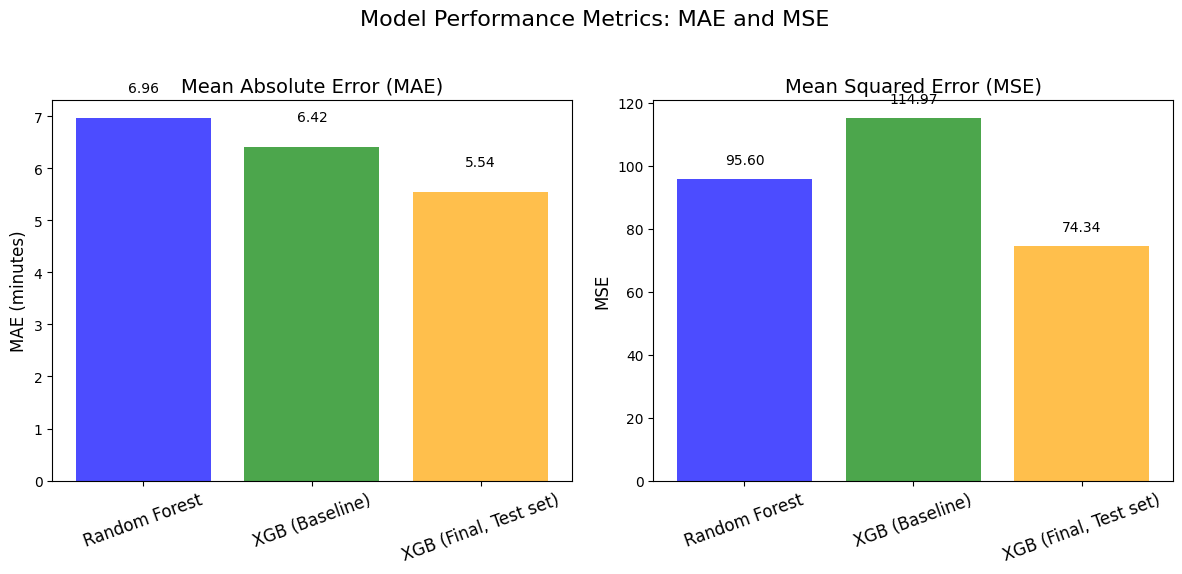

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ["Random Forest", "XGB (Baseline)", "XGB (Final, Test set)"]
mae_values = [6.96, 6.42, 5.54]  # MAE values for each model
mse_values = [95.60, 114.97, 74.34]  # MSE values for each model

x = np.arange(len(models))  # Positions for bars

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for MAE
axes[0].bar(x, mae_values, color=['blue', 'green', 'orange'], alpha=0.7)
axes[0].set_title("Mean Absolute Error (MAE)", fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=20, fontsize=12)
axes[0].set_ylabel("MAE (minutes)", fontsize=12)
for i, v in enumerate(mae_values):
    axes[0].text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=10)

# Subplot for MSE
axes[1].bar(x, mse_values, color=['blue', 'green', 'orange'], alpha=0.7)
axes[1].set_title("Mean Squared Error (MSE)", fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=20, fontsize=12)
axes[1].set_ylabel("MSE", fontsize=12)
for i, v in enumerate(mse_values):
    axes[1].text(i, v + 5, f"{v:.2f}", ha='center', fontsize=10)

# Adjust layout
fig.suptitle("Model Performance Metrics: MAE and MSE", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout

# Show the plot
plt.show()
